# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [3]:
# H_0 = Your null hypothesis
#The new email template has no effect on the response rate.
#Ho:p<=0.05
#where p is the new response rate for the new template

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = Your alternative hypothesis
#The new email template does improve the response rate.The new email template increases the response rate by at least 1% , meaning the response rate for the new template is greater than 5% .
#Ho:p>0.05
#where p is the new response rate for the new template

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [12]:
# Calculate the required sample size
import math
from scipy.stats import norm

𝛼 = 0.05
power = 0.80
𝛽 = 0.20
#Baseline proportion 
p0 = 0.05
#Target proportion 
p1 = 0.06
std_dev = 0.0475
#Minimum Detectable Effect (MDE) = 0.01

#Calculate Cohen's d (effect size)
def cohen_h(p1, p0):
    return 2 * (math.asin(math.sqrt(p1)) - math.asin(math.sqrt(p0)))

h = cohen_h(p1, p0)

#Get Z-scores for alpha and beta (one-tailed test)
z_alpha = norm.ppf(1 - 𝛼)
z_beta = norm.ppf(power)

#Calculate required sample size
n = ((z_alpha + z_beta) / h) ** 2

print(f"Cohen's h: {h:.4f}")
print(f"Required sample size: {round(n)}")

Cohen's h: 0.0439
Required sample size: 3207.0


## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

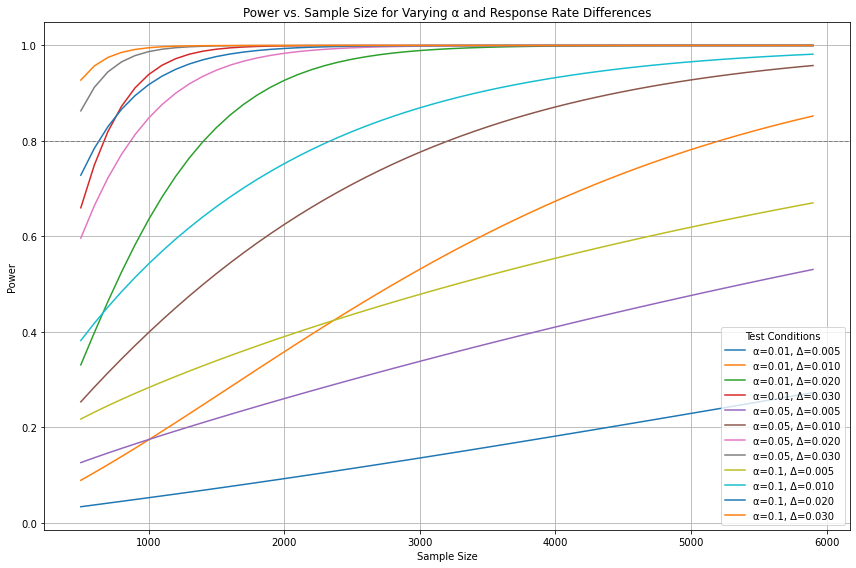

In [13]:
#Your code; plot power curves for the various alpha and effect size combinations
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

alphas = [0.01, 0.05, 0.1]
effect_sizes = [0.005, 0.01, 0.02, 0.03]
power = 0.8
p0 = 0.05
p1 = 0.06

sample_sizes = np.arange(500, 6000, 100)

def compute_power(n, p0, p1, alpha):
    h = 2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p0)))
    z_alpha = norm.ppf(1 - alpha)
    z_beta = np.sqrt(n) * h - z_alpha
    power = norm.cdf(z_beta)
    return power

plt.figure(figsize=(12, 8))
for alpha in alphas:
    for diff in effect_sizes:
        powers = [compute_power(n, p0, p0 + diff, alpha) for n in sample_sizes]
        label = f"α={alpha}, Δ={diff:.3f}"
        plt.plot(sample_sizes, powers, label=label)

plt.axhline(y=0.8, color='gray', linestyle='--', linewidth=1)
plt.title("Power vs. Sample Size for Varying α and Response Rate Differences")
plt.xlabel("Sample Size")
plt.ylabel("Power")
plt.legend(title="Test Conditions")
plt.grid(True)
plt.tight_layout()
plt.show()

a. Effect of Significance Level (α)

Lower α (e.g., 0.01) : The blue lines (e.g., α=0.01) are generally higher on the graph compared to the orange lines (α=0.10). This means that for the same sample size, lower α requires a larger sample size to achieve the same power .

Higher α (e.g., 0.10) : The orange lines (α=0.10) are lower on the graph, indicating that higher α allows for higher power with smaller sample sizes .


b. Effect of Effect Size (Δ)

Larger Δ (e.g., 0.030) : The lines corresponding to larger effect sizes (e.g., Δ=0.030) are lower on the graph compared to smaller effect sizes (e.g., Δ=0.005). This means that larger effect sizes require smaller sample sizes to achieve the same power.

Smaller Δ (e.g., 0.005) : The lines corresponding to smaller effect sizes (e.g., Δ=0.005) are higher on the graph, indicating that smaller effect sizes require larger sample sizes to achieve the same power .

c. Power Trends

As the sample size increases , the power (Y-axis) increases for all lines, approaching 1 (or 100% power).

The rate of increase in power depends on the combination of α and Δ. Larger effect sizes and higher α values lead to steeper increases in power with smaller sample sizes.

Practical Implications

Choosing α : A lower α (e.g., 0.01) provides stronger evidence against the null hypothesis but requires a larger sample size. A higher α (e.g., 0.10) allows for smaller sample sizes but increases the risk of a Type I error.

Choosing Δ : A larger effect size (Δ) is easier to detect and requires a smaller sample size. However, in real-world scenarios, effect sizes are often small, necessitating larger sample sizes to achieve adequate power.

Sample Size Planning : The graph helps researchers determine the minimum sample size required to achieve a desired power (e.g., 0.80) for a given α and Δ.

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [15]:
# Define key experimental parameters
alpha = 0.05
power = 0.80
baseline_rate = 0.05
target_rate = 0.06
effect_size = target_rate - baseline_rate
required_sample_size = 3207

# Create the summary
summary = f"""
📊 Final Experimental Design Proposal

🎯 Objective:
Test if a new email template improves the response rate from 5% to 6%.

🔬 Experimental Setup:
- Test Type: One-sample z-test for proportions
- Baseline Response Rate (p0): {baseline_rate:.2%}
- Target Response Rate (p1): {target_rate:.2%}
- Minimum Detectable Effect: {effect_size:.2%}
- Significance Level (α): {alpha}
- Power (1 - β): {power}
- Required Sample Size: {required_sample_size} individuals

✅ Advantages:
- Statistically sound with standard thresholds for Type I and Type II error
- Measures a meaningful change (1%)
- Uses a historically stable benchmark
- Limits risk by testing on a defined group before wider rollout

⚠️ Disadvantages:
- Requires a relatively large sample size
- Detecting small effects increases test duration
- Assumes the historical baseline rate remains stable
- Tests only one new variant at a time

💡 Recommendations:
- Run the test using 3,207 users with the new template
- Compare results to the 5% historical benchmark
- Consider follow-up A/B testing or testing for a larger lift (e.g., 2%) to reduce sample size needs
"""

print(summary)


📊 Final Experimental Design Proposal

🎯 Objective:
Test if a new email template improves the response rate from 5% to 6%.

🔬 Experimental Setup:
- Test Type: One-sample z-test for proportions
- Baseline Response Rate (p0): 5.00%
- Target Response Rate (p1): 6.00%
- Minimum Detectable Effect: 1.00%
- Significance Level (α): 0.05
- Power (1 - β): 0.8
- Required Sample Size: 3207 individuals

✅ Advantages:
- Statistically sound with standard thresholds for Type I and Type II error
- Measures a meaningful change (1%)
- Uses a historically stable benchmark
- Limits risk by testing on a defined group before wider rollout

⚠️ Disadvantages:
- Requires a relatively large sample size
- Detecting small effects increases test duration
- Assumes the historical baseline rate remains stable
- Tests only one new variant at a time

💡 Recommendations:
- Run the test using 3,207 users with the new template
- Compare results to the 5% historical benchmark
- Consider follow-up A/B testing or testing for 

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.